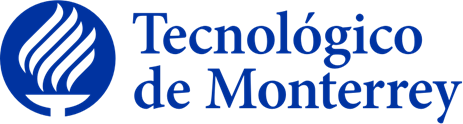

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Visión computacional para imágenes y video - TC4033.10**
### Prof: Dr. Gilberto Ochoa Ruiz

## **9.4 Google Colab con algoritmo Otsu**
## **Segmentación de Otsu**
### Marzo 10 de 2024

Los ejercicios que deben agregarse a este proyecto serán los siguientes:

- Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifica imágenes con diferentes backgrounds y estilos; cuales son las limitaciones de single thresholding contra el algoritmo de Otsu?
- (Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.


## **Nombres y matrículas de los integrantes del Equipo 24:**

* Victor Alejandro Regueira Romero | A01794404
* Fernando Maytorena Espinosa de los Monteros | A01110946
* Edgar Rodolfo Escobar Gómez | A01793900
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

Nota: Nuestro código de la actividad se encuentra al final, después del código de ejemplo suministrado por el profesor.

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import re
import skimage as ski
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2gray

import numpy as np

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

<ipython-input-3-ce81723eaa7b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


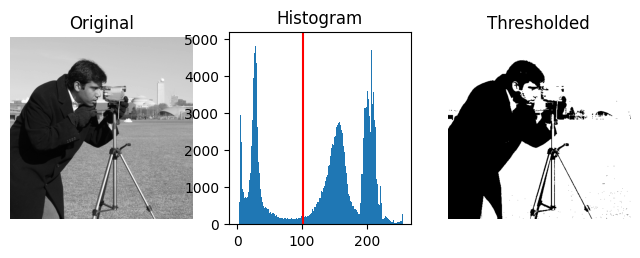

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




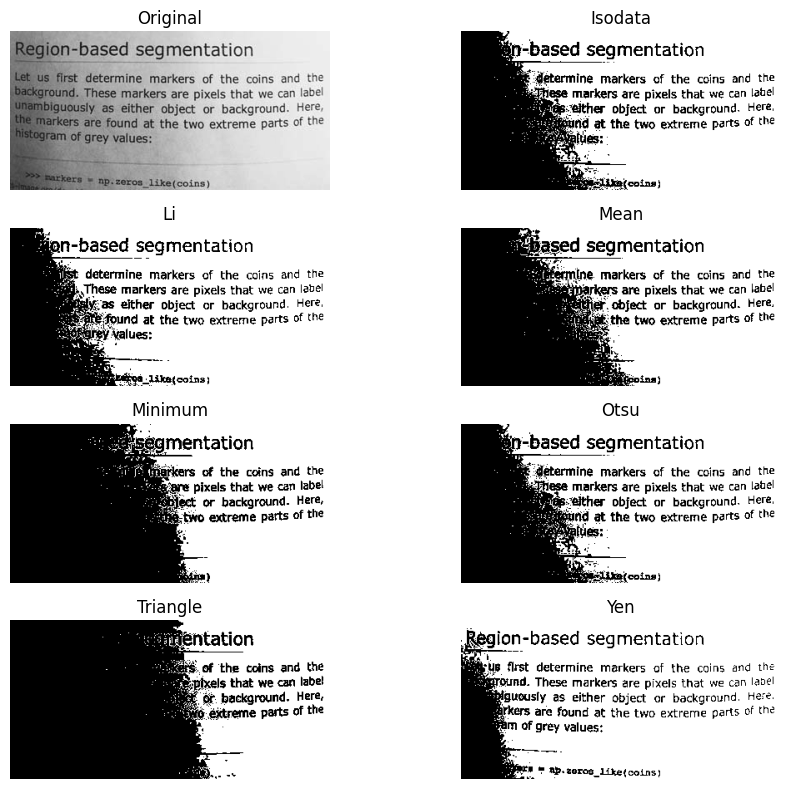

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

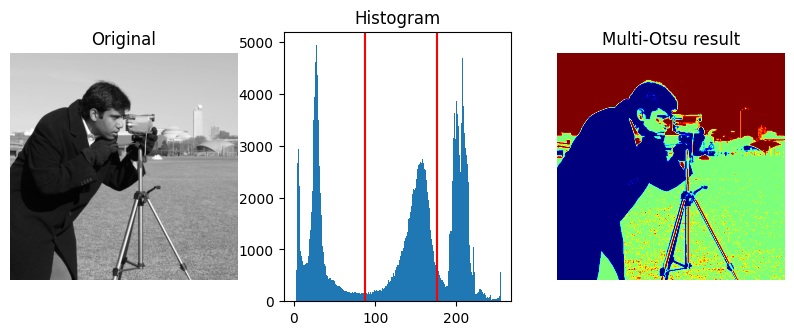

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Actividad

**Experimenta con diferentes imágenes ademas de las provistas en el Colab; identifica imágenes con diferentes backgrounds y estilos; cuales son las limitaciones de single thresholding contra el algoritmo de Otsu?**


En esta actividad, exploraremos en profundidad el algoritmo de segmentación de Otsu, una técnica poderosa para la segmentación de imágenes basada en el umbralizado. Compararemos este método con la segmentación por umbral simple para entender sus fortalezas y debilidades bajo diferentes condiciones de imagen.

Comenzaremos definiendo algunas funciones de apoyo para cargar, procesar y visualizar las imágenes y sus histogramas. Estas herramientas serán fundamentales para analizar cómo las diferentes técnicas de segmentación responden a variaciones en las imágenes.

In [ ]:
#Función de apoyo para graficar las imágenes
def plot_images(imgs: list, size, hist = False):

  rows = len(imgs)
  cols = 3
  fig = plt.figure(constrained_layout=True, figsize=size)
  subfigs = fig.subfigures(nrows=rows, ncols=1)


  for r,subfig in enumerate(subfigs):

    axes = subfig.subplots(nrows=1, ncols=3)
    subfig.suptitle(imgs[r]['title'])

    for i,(k,v) in enumerate(imgs[r]['images'].items()):

      axes[i].imshow(v, cmap = plt.cm.gray if 'original' not in k else None)
      axes[i].set_title(k)

      if (hist and k == 'gray_scale'):
          axes[cols-1].hist(v.ravel(), bins = 255)
          axes[cols-1].set_title('Histogram')

  plt.show()

#Función de apoyo para segmentar las imágenes
def segment_images(imgs):

  segmented = []
  for img in imgs:
    gray_scale = img['images']['gray_scale']

    #Para el simple thresh, tomaremos la mediana como referencia
    threshold = np.median(gray_scale)

    #Calculamos los thresholds
    simple_thresh = gray_scale > threshold
    otsu_thresh = gray_scale > threshold_otsu(gray_scale)

    #Ponemos las imágenes en un diccionario
    segmented.append({
        'title': img['title'],
        'images': {
               'before_thresh': gray_scale,
                'simple_thresh': simple_thresh,
                'otsu_thresh': otsu_thresh
        }

    })


  #Graficamos las imágenes
  plot_images(segmented, (15,10))



#Imágenes que estaremos usando
IMAGES = ['https://raw.githubusercontent.com/rafaeljosem/MNA-vision/main/data/isla_cabritos.jpg',
          'https://raw.githubusercontent.com/rafaeljosem/MNA-vision/main/data/dominican_way.jpg',
          'https://raw.githubusercontent.com/rafaeljosem/MNA-vision/main/data/playa_rincon.jpg',
          'https://raw.githubusercontent.com/rafaeljosem/MNA-vision/main/data/juan-luis-guerra.jpg']

## Selección y Preprocesamiento de Imágenes

Procedemos a seleccionar un conjunto diverso de imágenes para probar los métodos de segmentación. Este paso es crucial para evaluar cómo cada técnica maneja variaciones en iluminación, textura y complejidad de la escena.

In [ ]:
img_data = []

for i,img in enumerate(IMAGES):
  # Carga la imagen original desde la URL
  original_img = ski.io.imread(img)
  # Convierte la imagen original a escala de grises
  gray_scale = rgb2gray(original_img)
  # Extrae el nombre de la imagen de la URL para usarlo como título
  img_dict = {
      'title': re.search('([^\/]+)\/?$', img).group(),
      'images': {
            'original_img': original_img,  # Almacena la imagen original
            'gray_scale': gray_scale,      # Almacena la versión en escala de grises
      }
  }

  # Añade el diccionario con la imagen original y en escala de grises a la lista img_data
  img_data.append(img_dict)

Visualizamos las imágenes originales y sus histogramas para obtener una comprensión inicial de la distribución de intensidades en cada imagen.

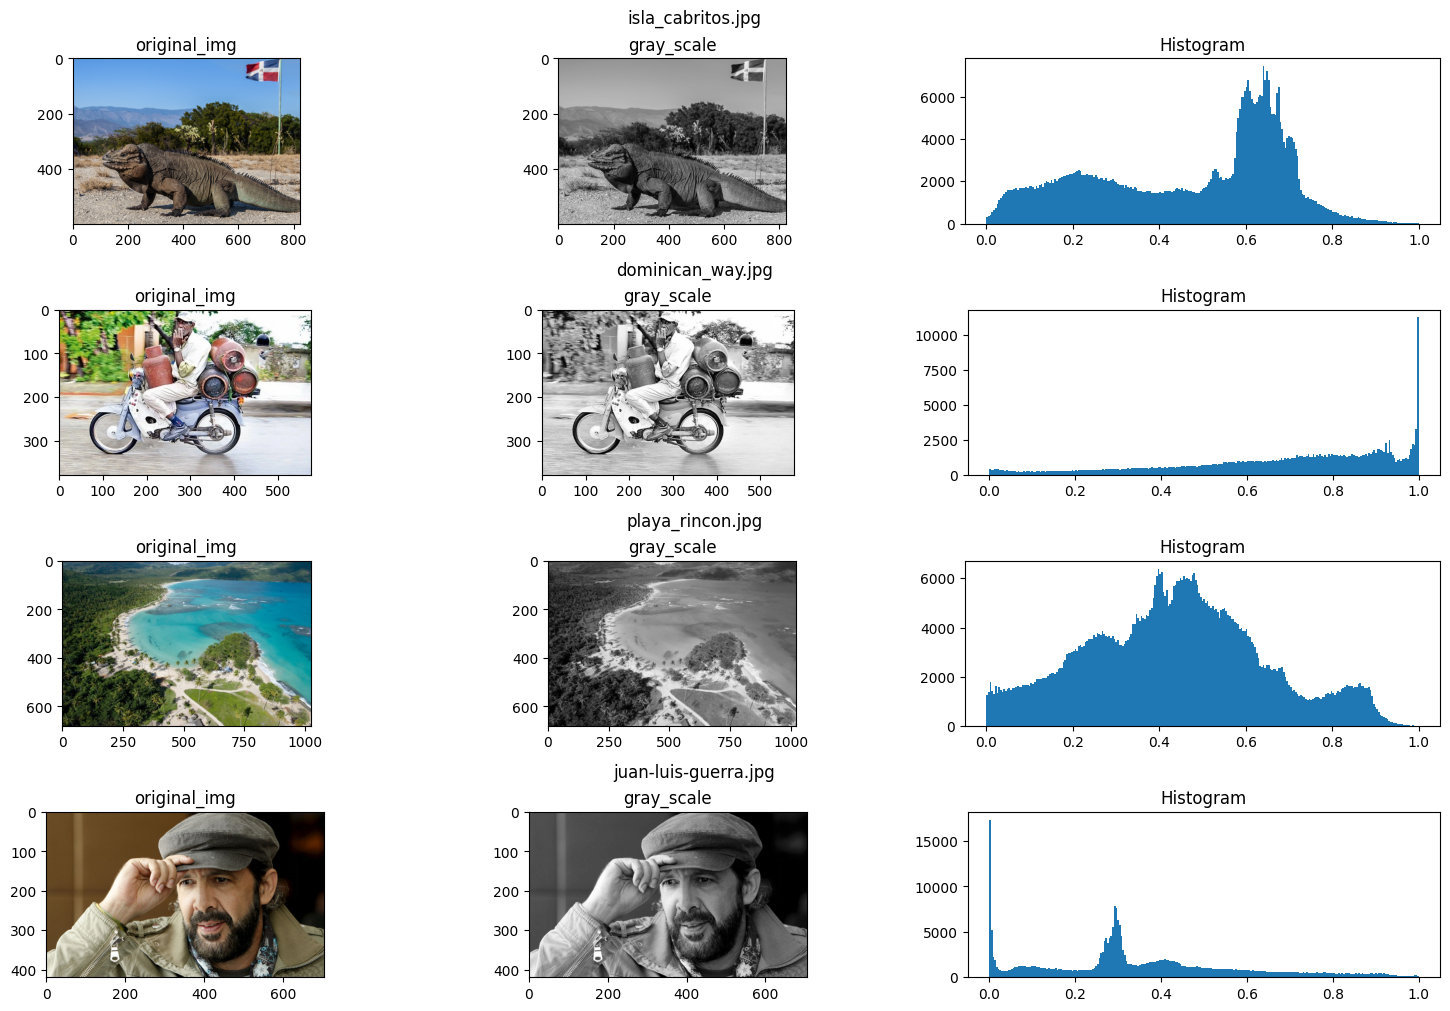

In [ ]:
plot_images(img_data, (15,10), True)

## Segmentación y Comparación

Con las imágenes listas, aplicamos y comparamos la segmentación por umbral simple y el método de Otsu. Esta comparación visual nos permitirá identificar las limitaciones y ventajas de cada técnica.

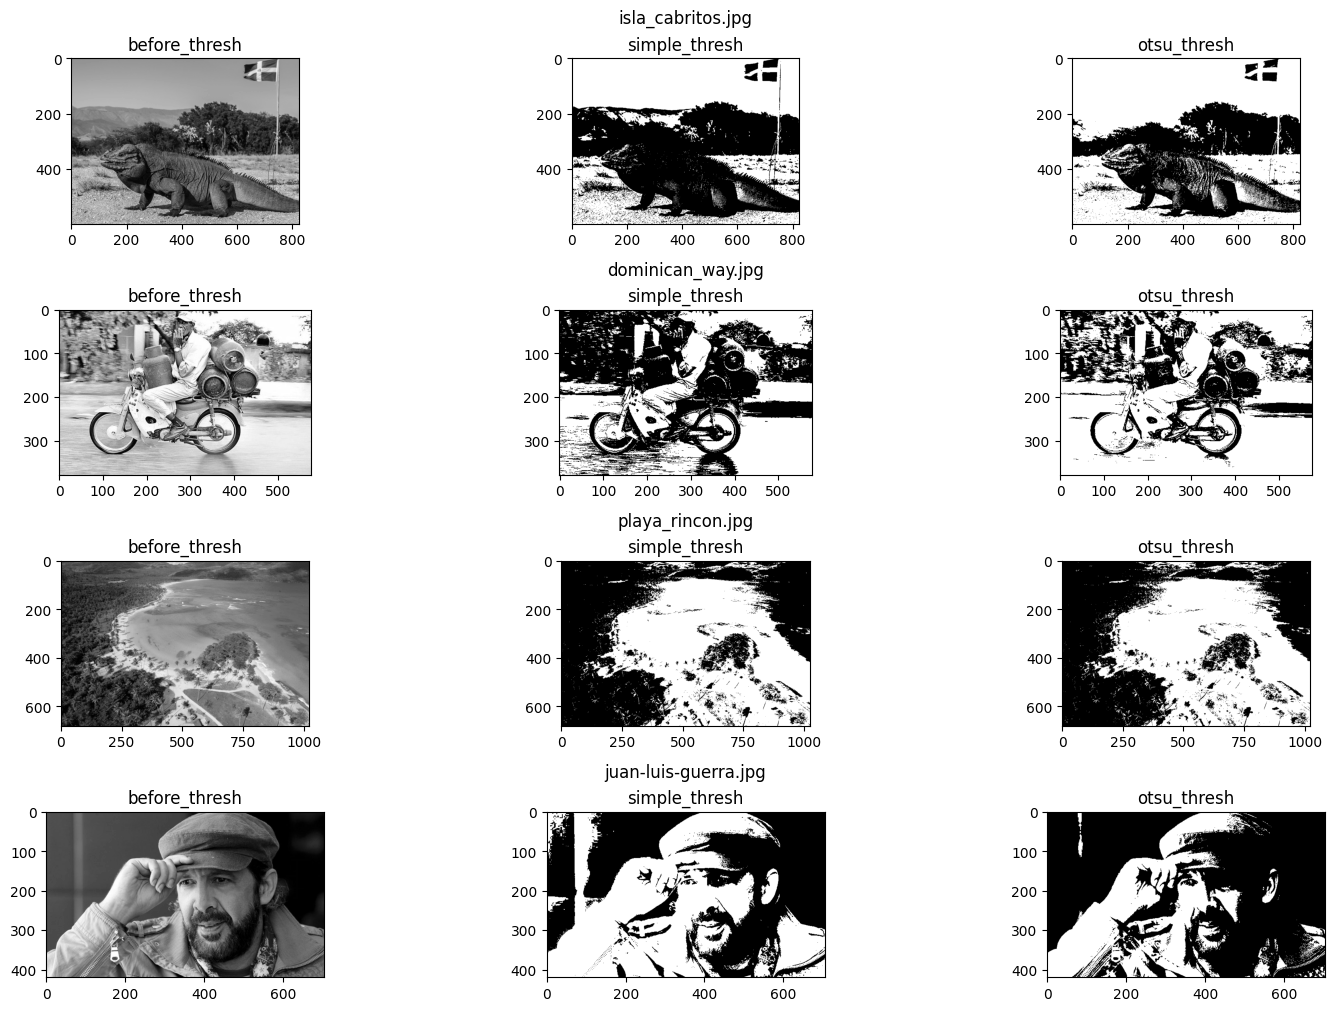

In [ ]:
segment_images(img_data)

Después de observar los resultados iniciales, nos enfocaremos en evaluar las limitaciones del umbral simple y el método de Otsu. Prestaremos especial atención a cómo cada método maneja variaciones en iluminación, ruido y fondos complejos. Esta evaluación crítica nos ayudará a identificar en qué circunstancias un método puede ser preferible sobre el otro.

***Cuales son las limitaciones de single thresholding contra el algoritmo de Otsu?***

Observando los resultados obtenidos, se puede concluir que al método de "single thresholding" se le dificulta manejar imágenes que contengan intensidades de iluminación variada. Por ejemplo una página de un libro iluminada por una lámpara lateralmente. La parte de la página cercana a la lámoara tendrá una mayor intensidad que la parte más alejada.

Otra limitación es la necesidad de definir el umbral, ya sea visualmente o a partir del histograma.

Una ventaja es que no es tan intenso computacionalmente como lo es el método de Otsu, lo cual lo puede hacer el preferido en dispositivos con baja capacidad computacional, alimentados por baterías o portables.


## Mejora mediante Otsu Localizado

**(Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.**

### Implementación de Otsu en Ventanas de Diferentes Tamaños

Para abordar algunas de las limitaciones observadas con el umbral global, exploraremos el uso del método de Otsu aplicado localmente en ventanas de diferentes tamaños. Este enfoque adaptativo puede ofrecer mejoras significativas en la segmentación para imágenes con variaciones locales en iluminación y textura.

In [ ]:
from skimage import io

def otsu_local(image, window_size):
    """
    Aplica el método de Otsu localmente en ventanas de la imagen.

    Parámetros:
    - image: Imagen en escala de grises.
    - window_size: Tamaño de la ventana (filas, columnas).

    Retorna:
    - Imagen segmentada.
    """
    segmented_image = np.zeros(image.shape)
    rows, cols = image.shape
    for i in range(0, rows, window_size[0]):
        for j in range(0, cols, window_size[1]):
            window = image[i:i+window_size[0], j:j+window_size[1]]
            if window.size == 0: continue  # Evita ventanas vacías
            threshold = threshold_otsu(window)
            segmented_window = window > threshold
            segmented_image[i:i+window_size[0], j:j+window_size[1]] = segmented_window
    return segmented_image

Utilizaremos este método mejorado para segmentar nuevamente nuestras imágenes de prueba. La comparación directa entre los resultados de la segmentación global y localizada nos permitirá discutir cómo la adaptabilidad local mejora la segmentación en ciertos casos, superando los desafíos identificados anteriormente con los métodos globales.

### Aplicación de la Segmentación de Otsu Localizada

Tras identificar las limitaciones de los métodos de segmentación global, ahora exploraremos cómo la aplicación localizada del método de Otsu puede ofrecer mejoras. Esta técnica consiste en dividir la imagen en ventanas más pequeñas y aplicar el método de Otsu en cada una de ellas, permitiendo una adaptación más precisa a las variaciones locales de iluminación y textura. A continuación, aplicaremos esta técnica a nuestras imágenes de prueba y compararemos los resultados con las segmentaciones globales previas.

In [ ]:
# Ahora aplicaremos Otsu localizado a cada imagen en escala de grises.
window_size = (50, 50)  # Ejemplo de tamaño de ventana. Ajusta según la imagen y tus necesidades.

# Aplicar Otsu localizado y almacenar los resultados para la comparación
for img in img_data:
    gray_scale = img['images']['gray_scale']
    segmented_local_otsu = otsu_local(gray_scale, window_size)

    # Añadir el resultado al diccionario de imágenes
    img['images']['local_otsu'] = segmented_local_otsu

### Comparación Visual y Discusión de los Resultados

Con la segmentación localizada de Otsu aplicada, ahora podemos comparar visualmente los resultados con las segmentaciones globales. Esta comparación nos permitirá evaluar cómo la segmentación adaptativa local mejora la precisión de la segmentación en áreas de la imagen con variaciones significativas de textura o iluminación. Observaremos específicamente cómo la segmentación localizada maneja mejor los detalles finos y las transiciones suaves en comparación con el método global, ofreciendo una segmentación más coherente y precisa.

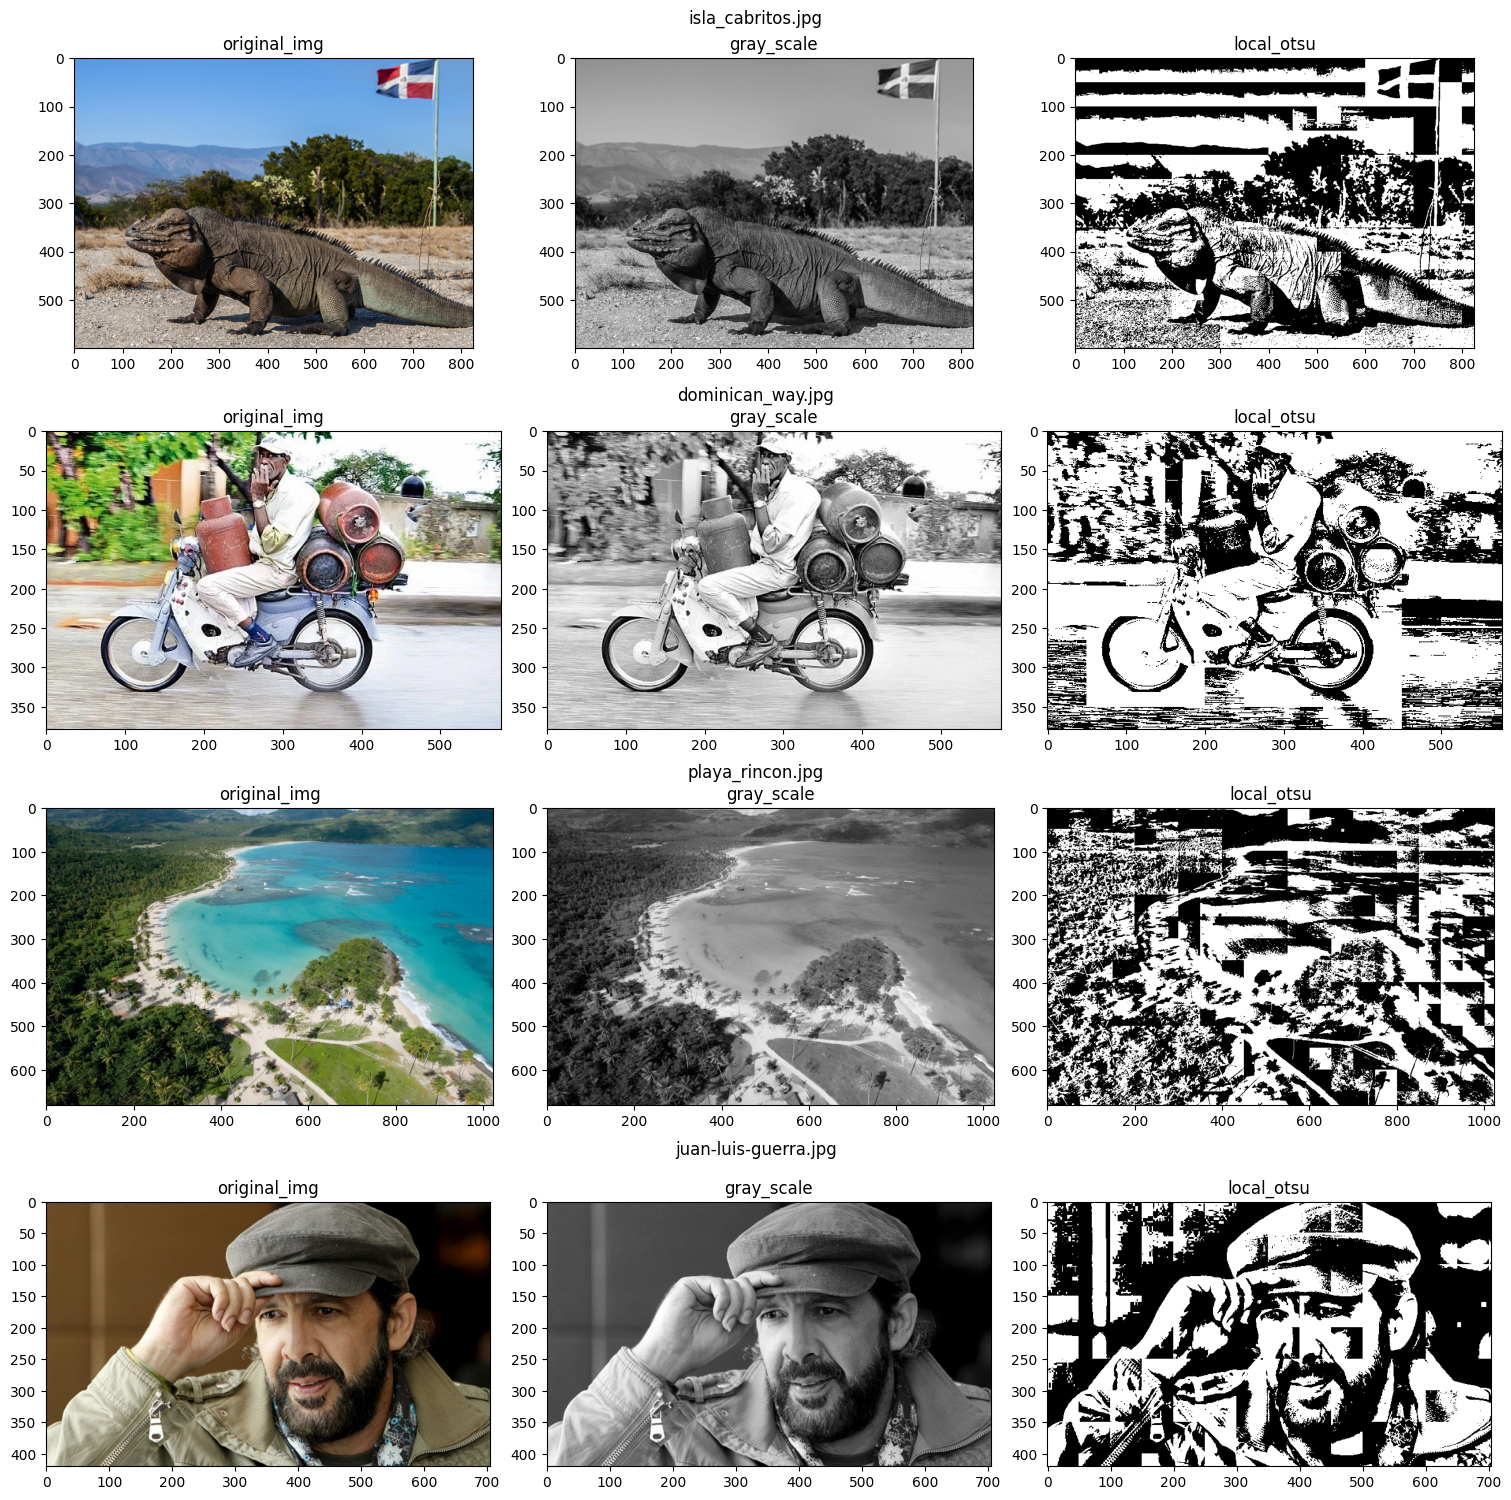

In [ ]:
# Visualizar las imágenes originales, segmentadas globalmente y localmente para comparación
plot_images(img_data, (15, 15), False)

# **BIBLIOGRAFIA**

GfG. (2021, July 29). *Mahotas - Otsu’s method*. GeeksforGeeks. https://www.geeksforgeeks.org/mahotas-otsus-method/

Gonzalez, R., y Woods, R. (2018). *Digital Image Processing*. 4th Edition Pearson.

OpenCV (s.f.). *Image thresholding*.  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Murzova, A. (2021, May 5). *Otsu’s Thresholding Technique*. LearnOpenCV. https://learnopencv.com/otsu-thresholding-with-opencv/

Ochoa, G. (Febrero de 2024). *Módulo 5. Tema 5.2 Histogramas por método de Otsu*. Presentación de Power Point, Maestría en Inteligencia Artificial Aplicada, ITESM.
.

.

.

.

.

.

.

.

.
eod
